<a href="https://colab.research.google.com/github/Bhavya-Agrawal/Hand-Gesture-Recognition/blob/main/Custom_model_training_hg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing dataset from Kaggle + Unzip the folders

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"parulds","key":"32048441e4514124050c3b35652b0885"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d prathumarikeri/indian-sign-language-isl

 97% 273M/281M [00:03<00:00, 97.7MB/s]
100% 281M/281M [00:03<00:00, 82.0MB/s]


In [ ]:
from zipfile import ZipFile
isl = "/content/indian-sign-language-isl.zip"
with ZipFile(isl,'r') as zip:
  zip.extractall();
  print("Dataset uploaded successfully !!!")

Dataset uploaded successfully !!!


# **Collecting the dataset**


### **Fetching all images**

In [ ]:
from glob import glob

In [ ]:

images = glob('/content/Indian/1/*.jpg', recursive=True)


In [ ]:
images[42000]

'/content/Indian/S/537.jpg'

### **Fetching Images and corresponsing Labels**

In [ ]:
unique_labels = []

total_images = []
folder_labels = []

folder_list = ['/content/Indian/1/*', '/content/Indian/2/*']

for folder in folder_list:

  images = glob(folder, recursive=True)

  for image in images:
    total_images.append(image)

    label = image.split('/')[-2]
    folder_labels.append(label)

    if label not in unique_labels:
      unique_labels.append(label)

In [ ]:
numerical_folder_labels=[]
for label in folder_labels:
  # print(type(label))
  # print(label)
  numerical_folder_labels.append(unique_labels.index(label))



print(numerical_folder_labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
print(len(folder_labels))
print(len(total_images))
print(unique_labels)
print(len(unique_labels))

42745
42745
['G', 'K', 'Z', 'A', 'P', 'Q', 'L', 'I', 'C', 'R', '6', 'D', 'H', '7', 'T', '1', 'E', '5', '4', 'W', 'O', '8', 'N', 'B', 'J', 'X', 'M', 'F', '2', 'V', 'U', '9', '3', 'Y', 'S']
35


# Train-Test Split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# run from here

In [3]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import splitfolders

In [5]:
splitfolders.ratio('/content/drive/MyDrive/HGData', 
                   output = 'ISL',
                   seed = 22, ratio = (.7,.2,.1))

Copying files: 402 files [00:04, 96.98 files/s] 


In [6]:
# converting RGB to grayscale images and storing the result in the same folder structure
import cv2
from skimage import io
import os
import shutil
folder_list = ['/content/ISL/train', '/content/ISL/val']

for current_folder in folder_list:
  main_folder = current_folder
  for image_folder in os.listdir(main_folder):
    internal_folder = os.path.join(main_folder, image_folder)
    for image in os.listdir(internal_folder):
      image_path = os.path.join(internal_folder, image)

      # read image
      frame = cv2.imread(image_path)  

      # convert image to grayscale     
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

      # apply gaussian blur to the image
      blur = cv2.GaussianBlur(gray,(5,5),2)
      
      # apply boundary to the actual character in the image
      th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)

      ret, res = cv2.threshold(th3, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

      # replace the existing colored image with above filtered image in the same location    
      if os.path.exists(image_path):
        os.remove(image_path)
      cv2.imwrite(image_path, res)


## Data Augmentation

In [7]:
import keras
from keras.preprocessing.image import ImageDataGenerator

In [8]:
# Data augmentation step
training_data_generator = ImageDataGenerator(rotation_range=20,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True,
                                             validation_split=0.2,
                                             rescale = 1/255)

test_data_generation = ImageDataGenerator(rescale=1/255)

In [9]:


train_generator = training_data_generator.flow_from_directory('/content/ISL/train', 
                                                               target_size=(150, 150), 
                                                               batch_size=20,
                                                               class_mode='binary')

validation_generator = training_data_generator.flow_from_directory('/content/ISL/val',
                                                                target_size=(150, 150),
                                                                batch_size=20,
                                                                class_mode='binary')
test_generator = test_data_generation.flow_from_directory('/content/ISL/test',
                                                                target_size=(150, 150),
                                                                batch_size=20,
                                                                class_mode='binary')

Found 280 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 42 images belonging to 2 classes.


# Visualising the images

In [ ]:
from skimage import io

def imshow(image_RGB):
  io.imshow(image_RGB)
  io.show()

In [ ]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(5,5),2)

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
rm = cv2.imread('/content/Indian/A/10.jpg')

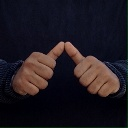

In [ ]:
cv2_imshow(rm)

20
[[[0.9973202  0.9973202  0.9973202 ]
  [0.9921569  0.9921569  0.9921569 ]
  [0.99417907 0.99417907 0.99417907]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.99956757 0.99956757 0.99956757]
  [0.9921569  0.9921569  0.9921569 ]
  [0.9921569  0.9921569  0.9921569 ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.9943005  0.9943005  0.9943005 ]
  [0.9921569  0.9921569  0.9921569 ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.       

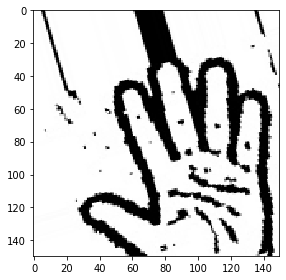

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.99677813 0.99677813 0.99677813]
  [0.9960785  0.9960785  0.9960785 ]
  [0.9960785  0.9960785  0.9960785 ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.99773866 0.99773866 0.99773866]
  [0.9960785  0.9960785  0.9960785 ]
  [0.9960785  0.9960785  0.9960785 ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.9986991  0.9986991  0.9986991 ]
  [0.9960785  0.9960785  0.9960785 ]
  [0.9960785  0.9960785  0.9960785 ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [0.9969134  0.9969134  0.9969134 ]
  [0.9960785  0.9960785  0.9960785 ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]


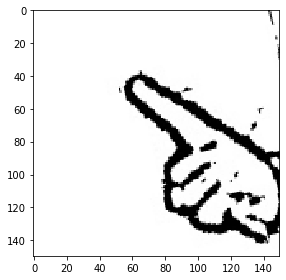

[[[1.0000000e+00 1.0000000e+00 1.0000000e+00]
  [1.0000000e+00 1.0000000e+00 1.0000000e+00]
  [1.0000000e+00 1.0000000e+00 1.0000000e+00]
  ...
  [9.9348456e-01 9.9348456e-01 9.9348456e-01]
  [9.9087113e-01 9.9087113e-01 9.9087113e-01]
  [7.3931581e-01 7.3931581e-01 7.3931581e-01]]

 [[1.0000000e+00 1.0000000e+00 1.0000000e+00]
  [1.0000000e+00 1.0000000e+00 1.0000000e+00]
  [1.0000000e+00 1.0000000e+00 1.0000000e+00]
  ...
  [9.9666911e-01 9.9666911e-01 9.9666911e-01]
  [9.9855620e-01 9.9855620e-01 9.9855620e-01]
  [3.6444244e-01 3.6444244e-01 3.6444244e-01]]

 [[1.0000000e+00 1.0000000e+00 1.0000000e+00]
  [1.0000000e+00 1.0000000e+00 1.0000000e+00]
  [1.0000000e+00 1.0000000e+00 1.0000000e+00]
  ...
  [9.9085391e-01 9.9085391e-01 9.9085391e-01]
  [9.8860258e-01 9.8860258e-01 9.8860258e-01]
  [6.2175676e-02 6.2175676e-02 6.2175676e-02]]

 ...

 [[4.8357180e-01 4.8357180e-01 4.8357180e-01]
  [2.0778654e-03 2.0778654e-03 2.0778654e-03]
  [1.6616887e-03 1.6616887e-03 1.6616887e-03]
  ..

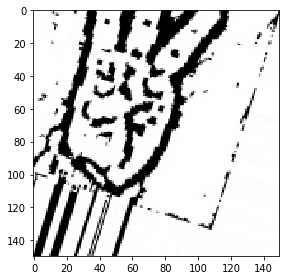

[[[0.55853826 0.55853826 0.55853826]
  [0.15908234 0.15908234 0.15908234]
  [0.78096926 0.78096926 0.78096926]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.29416847 0.29416847 0.29416847]
  [0.38709918 0.38709918 0.38709918]
  [0.7467571  0.7467571  0.7467571 ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[0.02970486 0.02970486 0.02970486]
  [0.9346227  0.9346227  0.9346227 ]
  [0.9887982  0.9887982  0.9887982 ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 ...

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]


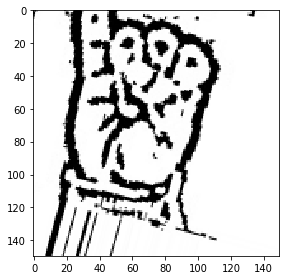

[[[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.9918498  0.9918498  0.9918498 ]
  [0.99164116 0.99164116 0.99164116]
  [0.99674785 0.99674785 0.99674785]]

 [[1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  ...
  [0.98683584 0.98683584 0.98683584]
  [0.9966551  0.9966551  0.9966551 ]
  [0.9942409  0.9942409  0.9942409 ]]

 [[0.9947451  0.9947451  0.9947451 ]
  [0.99725205 0.99725205 0.99725205]
  [0.99975896 0.99975896 0.99975896]
  ...
  [0.9868056  0.9868056  0.9868056 ]
  [0.99916553 0.99916553 0.99916553]
  [0.99257994 0.99257994 0.99257994]]

 ...

 [[1.         1.         1.        ]
  [0.9980512  0.9980512  0.9980512 ]
  [0.9895669  0.9895669  0.9895669 ]
  ...
  [1.         1.         1.        ]
  [1.         1.         1.        ]
  [1.         1.         1.        ]]

 [[1.         1.         1.        ]
  [0.9942908  0.9942908  0.9942908 ]


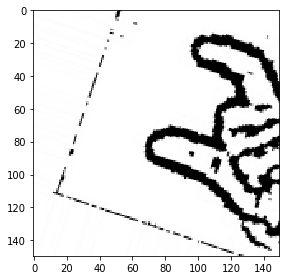

In [ ]:
train_images,train_labels = train_generator.next()

print(len(train_images))
for i in range(0,5):
    image = train_images[i]
    print(train_images[i])
    imshow(image)

# **Creating Model & Training the model**

In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from time import time

In [11]:
model = Sequential()

model.add(Conv2D(150, (3, 3), input_shape=( 150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(200, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(215, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(190, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten()) 
model.add(Dense(300))
model.add(Activation('relu'))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 150)     4200      
                                                                 
 activation (Activation)     (None, 148, 148, 150)     0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 150)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 200)       270200    
                                                                 
 activation_1 (Activation)   (None, 72, 72, 200)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 200)      0         
 2D)                                                    

In [13]:
from keras.layers import Input

In [ ]:
# img_rows, img_cols = 150, 150   # by default size is 224,224
# img_channels = 3

# img_dim = (img_rows, img_cols, img_channels)

# img_input = Input(shape=img_dim)

# #  model.add(Conv2D(150, (3, 3), input_shape=( 150, 150, 3)))

# x = Sequential()

# # Block 1
# x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
# x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
# x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# # Block 2
# x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
# x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
# x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# # Block 3
# x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
# x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
# x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
# x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# # Block 4
# x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
# x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
# x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
# x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# # Block 5
# x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
# x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
# x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
# x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)


# # Classification block
# x = Flatten(name='flatten')(x)
# x = Dense(4096, activation='relu', name='fc1')(x)
# x = Dense(4096, activation='relu', name='fc2')(x)
# x = Dense(35, activation='softmax', name='predictions')(x)

# # Create model.


# # model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
# #               optimizer='adam',
# #               metrics=['accuracy'])

  
# model = Model(inputs = img_input, outputs = x, name='VGG16_hand_gestures')

# model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               optimizer='adam',
#               metrics=['accuracy']
#               )

# print(model.summary())

Model: "VGG16_hand_gestures"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128

In [14]:
r = model.fit_generator(
        train_generator,
        #steps_per_epoch=18631 // batch_size,
        epochs=5,
        validation_data=validation_generator,
        #validation_steps=10119 // batch_size
        )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


14/14 [==============================] - 17s 185ms/step - loss: 0.8354 - accuracy: 0.5036 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 2/5
14/14 [==============================] - 2s 173ms/step - loss: 0.6932 - accuracy: 0.5143 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 3/5
14/14 [==============================] - 2s 170ms/step - loss: 0.6732 - accuracy: 0.5250 - val_loss: 0.6001 - val_accuracy: 0.6125
Epoch 4/5
14/14 [==============================] - 2s 167ms/step - loss: 0.4158 - accuracy: 0.8071 - val_loss: 1.3886 - val_accuracy: 0.6125
Epoch 5/5
14/14 [==============================] - 2s 170ms/step - loss: 0.6617 - accuracy: 0.7893 - val_loss: 0.4197 - val_accuracy: 0.8250


In [15]:
model.save('custom_model1.h5')

# Prediction for a single image

In [16]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/ISL/test/2/103.jpg', target_size = (150,150))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)


In [17]:
result

array([[0.40567806, 0.64690983]], dtype=float32)

In [18]:
result.shape

(1, 2)

In [ ]:
np.amax(result)

0.9329751

In [ ]:

max_value_index = np.where(result == np.amax(result))

shape_of_arr = result.shape

columns = shape_of_arr[1]

# total values ie (max value's row * columns) + (row number it has parsed) + (1 as its zero indexing, so on checking it can be skipped)

index_of_max_value = (max_value_index[0][0] * columns) + max_value_index[1][0] 

In [ ]:
max_value_index

(array([0]), array([18]))

In [ ]:
index_of_max_value

18

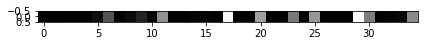

In [ ]:
io.imshow(result)

In [ ]:
model = load_model('custom_model.h5')

model.summary()

OSError: ignored

In [ ]:
classes = train_generator.class_indices

In [ ]:
classes

{'1': 0,
 '2': 1,
 '3': 2,
 '4': 3,
 '5': 4,
 '6': 5,
 '7': 6,
 '8': 7,
 '9': 8,
 'A': 9,
 'B': 10,
 'C': 11,
 'D': 12,
 'E': 13,
 'F': 14,
 'G': 15,
 'H': 16,
 'I': 17,
 'J': 18,
 'K': 19,
 'L': 20,
 'M': 21,
 'N': 22,
 'O': 23,
 'P': 24,
 'Q': 25,
 'R': 26,
 'S': 27,
 'T': 28,
 'U': 29,
 'V': 30,
 'W': 31,
 'X': 32,
 'Y': 33,
 'Z': 34}

In [ ]:
cv2.imread(result)

TypeError: ignored

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('custom_model.h5')

model.summary()

OSError: ignored

#### Taking input images from webcam

In [ ]:
def VGG16_hand_gestures(input_tensor=None,classes=2):    
   
    img_rows, img_cols = 200, 200   # by default size is 224,224
    img_channels = 3

    img_dim = (img_rows, img_cols, img_channels)
   
    img_input = Input(shape=img_dim)
    
    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    
    # Classification block
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dense(classes, activation='softmax', name='predictions')(x)

    # Create model.
   
     
    model = Model(inputs = img_input, outputs = x, name='VGG16_hand_gestures')

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    print(model.summary())
    return model